# Answering RQ2

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from _databrick import fix_df

In [3]:
trigger_df = fix_df[fix_df.Depth == 1]
trigger_df.shape

(1712, 5)

In [4]:
trigger_df.sample(5)

,Parent,Child,Bug Type,Depth,Refix
53138,33c38fe7d8a70af6666f0c62aff4c85da7d0ffea,bd163eeb6a757eb72bd80d57fce5ac3395042cb5,Same Function Less Args,1,True
544,af38b55b3c5e9bf2bd5fbe08f68e1d659340c66a,73b39f0f9d0221f0e932ea27f9ba779d6f5bb71b,Same Function Less Args,1,True
48054,b9ed7d8912c94ef77749c5bd672c670a94728c50,74d1fbf11bad03768e3b9a8b257e4c18ed05416f,Change Identifier Used,1,True
45901,3a22a9ee51df18a921e030800c6c2dfbbeff9097,9dd5793e47bf723549648c738d4e0e1afc3e2c74,Same Function More Args,1,True
48058,b9ed7d8912c94ef77749c5bd672c670a94728c50,74d1fbf11bad03768e3b9a8b257e4c18ed05416f,Change Identifier Used,1,True


In [5]:
len(trigger_df.Child.unique())

519

In [6]:
cnt_df = trigger_df.groupby('Bug Type').agg('size').to_frame('Size')\
    .sort_values(by='Size', ascending=False)
cnt_df

,Size
Bug Type,
Change Identifier Used,449
Wrong Function Name,254
Change Modifier,252
Same Function More Args,239
Change Numeric Literal,162
Change Binary Operator,73
Same Function Less Args,72
Change Boolean Literal,50
More Specific If,45


[None, None]

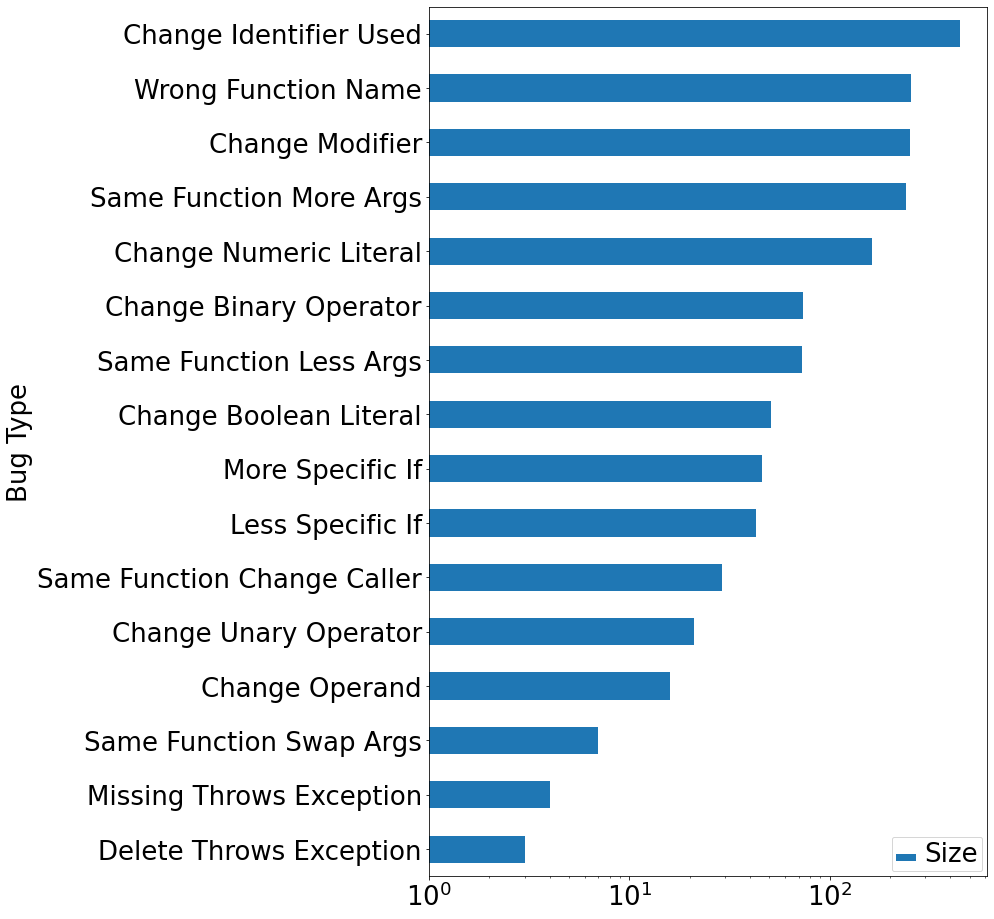

In [7]:
fontsize= 26
ax = cnt_df.Size.sort_values().plot.barh(
    legend=True,
    log=True,
    fontsize=fontsize,
    figsize=(10, 16),
)

ax.yaxis.label.set_fontsize(fontsize)
t = ax.get_legend().get_texts()
plt.setp(t, fontsize=fontsize)

In [8]:
ratio_cnt_df = fix_df.groupby('Bug Type').agg(
    Ratio=('Depth', lambda col: col[col == 1].size / col.size),
    Count=('Depth', 'size'),
)
ratio_cnt_df = ratio_cnt_df[ratio_cnt_df.Count > 100]\
    .sort_values(by='Ratio', ascending=False)

ratio_cnt_df

,Ratio,Count
Bug Type,,
Same Function More Args,0.722,331
Change Modifier,0.618,408
Change Binary Operator,0.468,156
Same Function Less Args,0.387,186
Change Numeric Literal,0.354,457
Change Identifier Used,0.293,1535
Wrong Function Name,0.230,1103


[None, None]

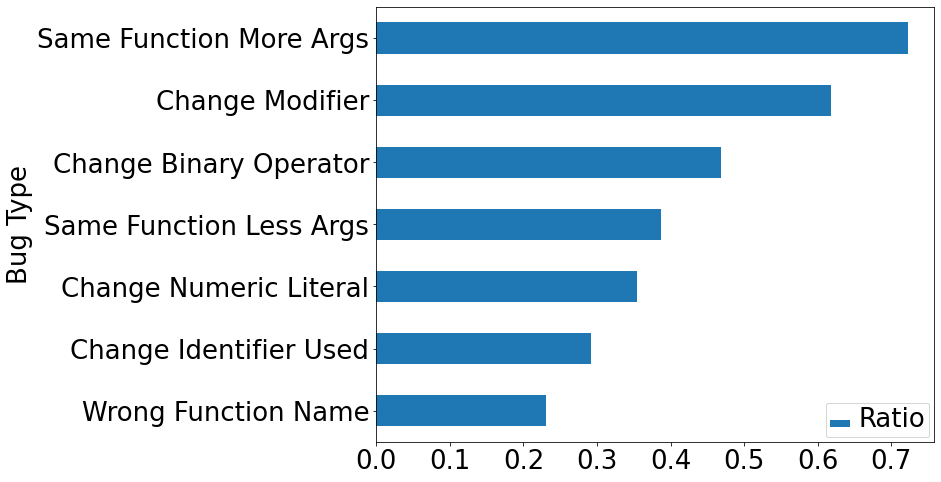

In [9]:
ax = ratio_cnt_df.Ratio.sort_values().plot.barh(
    legend=True,
    fontsize=fontsize,
    figsize=(10, 8),
)

ax.yaxis.label.set_fontsize(fontsize)
t = ax.get_legend().get_texts()
plt.setp(t, fontsize=fontsize)